# FraudGuard ML

## Project Overview
FraudGuard ML is an innovative, machine learning-driven project designed to detect and deter fraudulent credit card transactions. In an era where online transactions are increasingly becoming the norm, maintaining transactional integrity and security is paramount. FraudGuard ML contributes to this security by leveraging the power of machine learning to identify potentially fraudulent transactions.

Utilizing Python, a popular language in the data science realm due to its simplicity and powerful libraries, this project combines several machine learning techniques using libraries such as Scikit-learn. Flask, a lightweight and versatile web framework in Python, is used to create an API for model deployment.

The system is trained on a rich dataset consisting of both fraudulent and non-fraudulent transactions. The dataset provides the foundation for the learning model, as it captures crucial transaction characteristics, trends, and patterns that can potentially signal a fraudulent transaction.

The application offers a blend of data analytics and predictive modeling techniques to not just identify but also to learn and adapt to evolving transaction patterns. This ensures the system stays effective and up-to-date in the ever-changing landscape of online transactions.

## Project Steps

### Step 1: Data Acquisition and Understanding
The foundation of this project is a comprehensive dataset of credit card transactions. Our goal in this step is to find a dataset that includes both fraudulent and non-fraudulent transactions. Once the data is obtained, understanding the variables and their meanings is crucial for the subsequent analysis.

### Step 2: Exploratory Data Analysis (EDA) and Preprocessing
We begin by analyzing the dataset using various EDA techniques to understand the data's structure, characteristics, and hidden patterns. This phase includes cleaning the data, managing missing values and outliers, and addressing class imbalance issues commonly found in fraud detection scenarios.

### Step 3: Flask API Structure
Simultaneously, we start setting up the basic structure of the Flask API. This step involves creating the necessary endpoints that will interact with our machine learning model. Although the model isn't ready yet, setting up the API structure early on paves the way for smooth integration later.

### Step 4: Feature Selection and Engineering
Once the data is preprocessed, we move on to the feature selection and engineering stage. This involves determining which variables or features are most relevant to our machine learning model. New features can also be created from existing ones to improve the model's performance.

### Step 5: Model Building and Evaluation
With the relevant features identified, we start building the machine learning model. This process involves training the model on our dataset and tuning it to best capture the patterns within the data. Subsequently, we evaluate the model using various metrics to ensure its accuracy and reliability in identifying fraudulent transactions.

### Step 6: Flask API and Model Integration
Upon successful model training and evaluation, we integrate the model with our previously set up Flask API. This allows the model to receive input data through the API, process it, and return predictions indicating whether a given transaction is likely to be fraudulent.

### Step 7: Testing and Documentation
This final phase involves rigorous testing of all parts of the project. From the machine learning model's prediction accuracy to the Flask API's performance, all components are put through thorough testing to ensure they work as expected. The project's documentation is completed in this step, detailing the methods, findings, and functionality of the system for transparency and replicability.

### Step 1: Data Acquisition and Understanding

In [937]:
# Importing libraries
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [938]:
# Shows all the columns
pd.set_option('display.max_columns',None)

# Set the float values to decimal points
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [939]:
# Read in the fraudTrainlarge.csv file into a Pandas DataFrame
transaction_fraud_data = pd.read_csv(
    Path('./Resources/fraudTrainsmall.csv')
)

# Review DataFrame
display(transaction_fraud_data.head())
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
display(transaction_fraud_data.tail())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2700000000000000.00,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,1,1/1/2019 0:00,630000000000.00,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2,1/1/2019 0:00,38900000000000.00,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,3,1/1/2019 0:01,3530000000000000.00,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,4,1/1/2019 0:03,376000000000000.00,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
373480,373480,11/22/2019 3:33,4310000000000000.00,"fraud_Feil, Hilpert and Koss",food_dining,69.67,Renee,Walls,F,86542 Jessica Fords Apt. 706,Veedersburg,IN,47987,40.12,-87.26,4049,"Development worker, community",10/19/1959,03b0e3779a560a1ec260ba05587b9a64,1353555197,40.22,-86.58,0
373481,373481,11/22/2019 3:34,38200000000000.00,"fraud_Rutherford, Homenick and Bergstrom",grocery_net,49.94,Jesse,Roberts,M,8415 Vaughn Squares Apt. 788,Acworth,NH,3601,43.20,-72.30,477,Naval architect,4/15/1988,593bec973bf5bae6b84610bb32f33a83,1353555255,43.00,-73.00,0
373482,373482,11/22/2019 3:34,60422928733.00,fraud_Bartoletti-Wunsch,gas_transport,77.15,Jeffrey,Powers,M,38352 Parrish Road Apt. 652,North Augusta,SC,29860,33.60,-81.97,46944,Secondary school teacher,4/2/1942,423dd7fdb6d5c0703bfc11bb655d4262,1353555275,33.93,-82.21,0
373483,373483,11/22/2019 3:34,4260000000000000000.00,fraud_Kunze Inc,grocery_pos,116.44,George,Smith,M,7377 Walton Extensions Apt. 979,Dallas,TX,75236,32.69,-96.92,1263321,"Designer, interior/spatial",9/27/1952,07aac199fb376ab046520cfeada8ae84,1353555282,32.60,-96.60,0
373484,373484,11/22/2019 3:35,6510000000000000.00,fraud_Kiehn-Emmerich,grocery_pos,233.31,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71854,33.43,-93.88,36438,Surgeon,4/15/1985,815fb322aca2e83393dc9fa00466691b,1353555317,33.44,-93.62,0


In [940]:
# Check DataFrame data information
display(transaction_fraud_data.info())
print('Duplicates:')
display(transaction_fraud_data.duplicated().sum())
print('Null Values:')
display(transaction_fraud_data.isnull().sum())
print('Shape')
display(transaction_fraud_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373485 entries, 0 to 373484
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             373485 non-null  int64  
 1   trans_date_trans_time  373485 non-null  object 
 2   cc_num                 373485 non-null  float64
 3   merchant               373485 non-null  object 
 4   category               373485 non-null  object 
 5   amt                    373485 non-null  float64
 6   first                  373485 non-null  object 
 7   last                   373485 non-null  object 
 8   gender                 373485 non-null  object 
 9   street                 373485 non-null  object 
 10  city                   373485 non-null  object 
 11  state                  373485 non-null  object 
 12  zip                    373485 non-null  int64  
 13  lat                    373485 non-null  float64
 14  long                   373485 non-nu

None

Duplicates:


0

Null Values:


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Shape


(373485, 23)

### Step 2: Exploratory Data Analysis (EDA) and Preprocessing

In [941]:
# Drop the columns only if they exist in the DataFrame
columns_to_drop = ['Unnamed: 0', 'cc_num', 'trans_date_trans_time', 'unix_time', 'merchant', 'first', 'last', 'job', 'city', 'state', 'street', 'dob', 'trans_num', 'zip', 'lat', 'long', 'merch_lat', 'merch_long']
transaction_fraud_data = transaction_fraud_data.drop(columns=[col for col in columns_to_drop if col in transaction_fraud_data.columns])

# Review the DataFrame
display(transaction_fraud_data.head())


,category,amt,gender,city_pop,is_fraud
0,misc_net,4.97,F,3495,0
1,grocery_pos,107.23,F,149,0
2,entertainment,220.11,M,4154,0
3,gas_transport,45.00,M,1939,0
4,misc_pos,41.96,M,99,0


In [942]:
transaction_fraud_data.dtypes

category     object
amt         float64
gender       object
city_pop      int64
is_fraud      int64
dtype: object

In [943]:
categorical_variables = ['category', 'gender']

In [944]:
enc = OneHotEncoder(sparse=False)

In [945]:
encoded_data = enc.fit_transform(transaction_fraud_data[categorical_variables])

In [946]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables)
)

# Review the DataFrame
display(encoded_df)

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373480,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
373481,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
373482,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
373483,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [947]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
# Create numerical variable df from original df 
numerical_variables = transaction_fraud_data.select_dtypes(include=['int64'])

encoded_df = pd.concat([encoded_df, numerical_variables], axis=1)

# Review the Dataframe
display(encoded_df)

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,city_pop,is_fraud
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,3495,0
1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,149,0
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4154,0
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1939,0
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373480,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,4049,0
373481,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,477,0
373482,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,46944,0
373483,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1263321,0


In [981]:
encoded_df.columns

Index(['category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M',
       'city_pop', 'is_fraud'],
      dtype='object')

In [982]:
len(encoded_df['is_fraud'].value_counts())

2

### Step 4: Feature Selection and Engineering

In [983]:
y = encoded_df['is_fraud']

X = encoded_df.drop(columns=['is_fraud'])
                    
display(y)

0         0
1         0
2         0
3         0
4         0
         ..
373480    0
373481    0
373482    0
373483    0
373484    0
Name: is_fraud, Length: 373485, dtype: int64

In [984]:
display(X)

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,city_pop
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,3495
1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,149
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4154
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1939
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373480,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,4049
373481,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,477
373482,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,46944
373483,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1263321


In [985]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [986]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [987]:
y_train.value_counts()

0    278227
1      1886
Name: is_fraud, dtype: int64

In [988]:
random_oversampler = RandomOverSampler(random_state=10)

X_resampled, y_resampled = random_oversampler.fit_resample(X_train_scaled, y_train)

In [989]:
y_resampled.value_counts()

0    278227
1    278227
Name: is_fraud, dtype: int64

In [998]:

# Create an instance of PolynomialFeatures with desired degree
poly_transformer = PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)

# Fit and transform the training data
X_train_poly = poly_transformer.fit_transform(X_resampled)

# Transform the testing data
X_test_poly = poly_transformer.transform(X_test_scaled)

In [999]:
# Declare a logistic regression model.
# Apply a random_state of 7 to the model
class_weights = {0: 1, 1: 2}

logistic_regression_model = LogisticRegression(class_weight=class_weights, random_state=32)

In [1000]:
lr_model = logistic_regression_model.fit(X_train_poly, y_resampled)

# Define the hyperparameter grid
#param_grid = {
    #'C': [100.0],
    #'penalty': ['l2']
#}

# Perform grid search with cross-validation
#grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X_train, y_train)

# Print the best hyperparameters
#print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
#best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
#accuracy = best_model.score(X_test, y_test)
#print("Accuracy:", accuracy)

# Perform cross-validation
#cv_scores = cross_val_score(lr_model, X_resampled, y_resampled, cv=8, scoring='accuracy')

# Print the cross-validation scores
#print("Cross-validation scores:", cv_scores)
#print("Average cross-validation score:", np.mean(cv_scores))

In [1001]:
testing_predictions = lr_model.predict(X_test_scaled)

# Review the predictions
#testing_predictions
# Save both the test predictions and actual test values to a DataFrame
results_df = pd.DataFrame({
    "Testing Data Predictions": testing_predictions,
    "Testing Data Actual Targets": y_test})
results_df

,Testing Data Predictions,Testing Data Actual Targets
199410,1,0
67302,0,0
150369,1,0
244440,0,0
71200,0,0
...,...,...
92456,0,0
197261,0,0
351126,1,0
220951,1,0


In [1002]:
len(testing_predictions)

93372

In [1003]:
len(y_test)

93372

In [1004]:
len(y_resampled)

556454

In [1005]:
len(X_resampled)

556454

In [1006]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, testing_predictions)

0.47780919333419014

In [1007]:
#Generate training predictions
training_predictions = lr_model.predict(X_train_poly)

In [1008]:
#Print the confusion matrix
training_matrix = confusion_matrix(y_resampled, training_predictions)
print(training_matrix)

[[132416 145811]
 [ 44819 233408]]


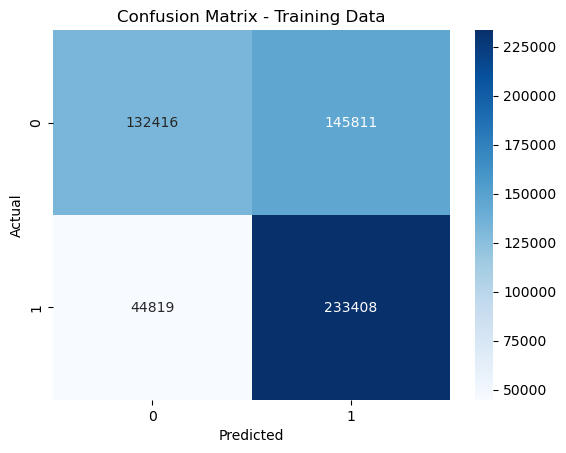

In [1009]:
# Create a heatmap of the confusion matrix
sns.heatmap(training_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.show()

In [1010]:
# Save a classification report
training_report = classification_report(y_resampled, training_predictions)
# Then view its output
# Save the confusion matrix for the test labels
testing_matrix = confusion_matrix(y_test, testing_predictions)
print(training_report)

              precision    recall  f1-score   support

           0       0.75      0.48      0.58    278227
           1       0.62      0.84      0.71    278227

    accuracy                           0.66    556454
   macro avg       0.68      0.66      0.65    556454
weighted avg       0.68      0.66      0.65    556454



In [1011]:
# Save the confusion matrix for the test labels
testing_matrix = confusion_matrix(y_test, testing_predictions)

# Save the classification report for the test labels
testing_report = classification_report(y_test, testing_predictions)
# View the output
display(print(testing_matrix))
display(print(testing_report))

[[44081 48646]
 [  112   533]]


None

              precision    recall  f1-score   support

           0       1.00      0.48      0.64     92727
           1       0.01      0.83      0.02       645

    accuracy                           0.48     93372
   macro avg       0.50      0.65      0.33     93372
weighted avg       0.99      0.48      0.64     93372



None